In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
import copy
from sklearn.preprocessing import LabelEncoder

<h2>Data Prep </h2>

In [2]:
# caricamento del dataset
df = pd.read_csv("../Datasets/ravdess_features_dm2/InitialPreProcessedDataSet.csv", skipinitialspace=True)
df = df.drop(['Unnamed: 0'],axis=1)
df

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_count,sum,std,q25,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,158558,0.145081,0.004001,-0.000031,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,160160,0.114319,0.004283,-0.000031,...,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,156956,0.149963,0.005084,0.000000,...,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,152152,0.139618,0.004886,-0.000031,...,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,169769,0.137665,0.002956,-0.000031,...,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,speech,surprised,normal,Dogs are sitting by the door,2nd,F,168168,-0.154480,0.005399,0.000000,...,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814
1824,speech,surprised,strong,Kids are talking by the door,1st,F,174575,-0.139679,0.008788,-0.000031,...,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583
1825,speech,surprised,strong,Kids are talking by the door,2nd,F,169770,-0.210968,0.009933,0.000000,...,2.505409,-1.472613,631.801688,0.634339,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954
1826,speech,surprised,strong,Dogs are sitting by the door,1st,F,185786,-0.085876,0.012221,-0.000031,...,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045


<h4>One-hot encoding</h4>

In [3]:
# display delle variabili categoriche
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

vocal_channel          object
emotion                object
emotional_intensity    object
statement              object
repetition             object
sex                    object
dtype: object

In [4]:
df_temp = copy.deepcopy(df)
df_temp

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_count,sum,std,q25,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,158558,0.145081,0.004001,-0.000031,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,160160,0.114319,0.004283,-0.000031,...,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,156956,0.149963,0.005084,0.000000,...,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,152152,0.139618,0.004886,-0.000031,...,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,169769,0.137665,0.002956,-0.000031,...,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,speech,surprised,normal,Dogs are sitting by the door,2nd,F,168168,-0.154480,0.005399,0.000000,...,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814
1824,speech,surprised,strong,Kids are talking by the door,1st,F,174575,-0.139679,0.008788,-0.000031,...,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583
1825,speech,surprised,strong,Kids are talking by the door,2nd,F,169770,-0.210968,0.009933,0.000000,...,2.505409,-1.472613,631.801688,0.634339,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954
1826,speech,surprised,strong,Dogs are sitting by the door,1st,F,185786,-0.085876,0.012221,-0.000031,...,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045


In [5]:
#elimino la colonna emotion perchè categorica, ma prima me la salvo perchè la aggiungerò in seguito
df_temp = df_temp.drop(['emotion'], axis =1)
df_temp
df_temp.columns

#df_temp è un dataframe uguale a quello di partenza ma senza la colonna emotion

Index(['vocal_channel', 'emotional_intensity', 'statement', 'repetition',
       'sex', 'frame_count', 'sum', 'std', 'q25', 'q50',
       ...
       'sc_kur_w4', 'sc_skew_w4', 'stft_sum_w4', 'stft_mean_w4', 'stft_std_w4',
       'stft_min_w4', 'stft_q75_w4', 'stft_q95_w4', 'stft_kur_w4',
       'stft_skew_w4'],
      dtype='object', length=237)

In [6]:
#inizio il processo di trasformazione delle variabili categoriche --> numeriche (in questo caso sono binarie)
le = LabelEncoder()

#quello che farò è: salvo in label l'array dei record codificati; elimino la colonna con le variabili categoriche;
#assegno ad una nuova colonna i valori che trovo in label

# variabile VOCAL CHANNEL 
label = le.fit_transform(df_temp['vocal_channel'])
# song:0, speech:1
df_temp.drop("vocal_channel", axis=1, inplace=True)
df_temp['vocal_channel_bin'] = label

# variabile EMOTIONAL INTENSITY 
label = le.fit_transform(df_temp['emotional_intensity'])
# normal:0, strong:1
df_temp.drop("emotional_intensity", axis=1, inplace=True)
df_temp['emotional_intensity_bin'] = label

# variabile STATEMENT 
label = le.fit_transform(df_temp['statement'])
# Dogs are sitting by the door:0, Kids are talking by the door:1
df_temp.drop("statement", axis=1, inplace=True)
df_temp['statement_bin'] = label

# variabile REPETITION 
label = le.fit_transform(df_temp['repetition'])
# 1st:0, 2nd:1
df_temp.drop("repetition", axis=1, inplace=True)
df_temp['repetition_bin'] = label

# variabile SEX 
label = le.fit_transform(df_temp['sex'])
# Female:0, Male:1
df_temp.drop("sex", axis=1, inplace=True)
df_temp['sex_bin'] = label

In [7]:
#display delle nuove variabili categoriche - to check
df_temp.dtypes[df_temp.dtypes.map(lambda x: x == 'object')] #--gives no features as result: no object columns
df_temp

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel_bin,emotional_intensity_bin,statement_bin,repetition_bin,sex_bin
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.000000,0.896606,1.0,6.742190,-1.706215,1,0,1,0,1
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.270133,0.874713,1.0,-0.700420,-0.201495,1,0,1,1,1
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,0.000000,0.899156,1.0,1.688986,-1.024773,1,0,0,0,1
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,0.205616,0.886474,1.0,-0.594111,-0.412871,1,0,0,1,1
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.177847,0.878014,1.0,0.126535,-0.620782,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.000000,0.893268,1.0,0.262900,-1.051814,1,0,0,1,0
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.000000,0.900089,1.0,-0.857759,-0.608583,1,1,1,0,0
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,0.000000,0.891486,1.0,-0.656632,-0.586954,1,1,1,1,0
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.000000,0.869563,1.0,-0.499022,-0.849045,1,1,0,0,0


In [8]:
df_temp2=copy.deepcopy(df_temp)
df_temp2['emotion']=df['emotion']
df_temp2

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel_bin,emotional_intensity_bin,statement_bin,repetition_bin,sex_bin,emotion
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.896606,1.0,6.742190,-1.706215,1,0,1,0,1,neutral
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.874713,1.0,-0.700420,-0.201495,1,0,1,1,1,neutral
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,0.899156,1.0,1.688986,-1.024773,1,0,0,0,1,neutral
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,0.886474,1.0,-0.594111,-0.412871,1,0,0,1,1,neutral
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.878014,1.0,0.126535,-0.620782,1,0,1,0,1,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.893268,1.0,0.262900,-1.051814,1,0,0,1,0,surprised
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.900089,1.0,-0.857759,-0.608583,1,1,1,0,0,surprised
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,0.891486,1.0,-0.656632,-0.586954,1,1,1,1,0,surprised
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.869563,1.0,-0.499022,-0.849045,1,1,0,0,0,surprised


In [9]:
# variabile EMOTION 
le.fit(df_temp2['emotion'])
print(list(le.classes_))
# angry:0, calm:1, disgust:2, fearful:3, happy:4, neutral:5, sad:6, surprised:7 
label=le.transform(df_temp2['emotion'])
df_temp2.drop("emotion", axis=1, inplace=True)
df_temp2['emotion_num'] = label

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [10]:
dfenc = df_temp2 #chiamo dfenc quello con le variabili one-hot encoded, incluso emotion
dfenc

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel_bin,emotional_intensity_bin,statement_bin,repetition_bin,sex_bin,emotion_num
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.896606,1.0,6.742190,-1.706215,1,0,1,0,1,5
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.874713,1.0,-0.700420,-0.201495,1,0,1,1,1,5
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,0.899156,1.0,1.688986,-1.024773,1,0,0,0,1,5
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,0.886474,1.0,-0.594111,-0.412871,1,0,0,1,1,5
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.878014,1.0,0.126535,-0.620782,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.893268,1.0,0.262900,-1.051814,1,0,0,1,0,7
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.900089,1.0,-0.857759,-0.608583,1,1,1,0,0,7
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,0.891486,1.0,-0.656632,-0.586954,1,1,1,1,0,7
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.869563,1.0,-0.499022,-0.849045,1,1,0,0,0,7


### Data partitioning e normalizzazione

In [11]:
# SCELTA VARIABILI TARGET

df2=copy.deepcopy(dfenc)

#Variabile target yem: emotion (codificata)
yem = np.array(df2['emotion_num'])

#variabile target ysex: sex (codificata)
ysex = np.array(df2['sex_bin'])

df2.head()

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel_bin,emotional_intensity_bin,statement_bin,repetition_bin,sex_bin,emotion_num
0,158558,0.145081,0.004001,-0.000031,0.0,0.0,15.028520,0.904033,0.000000,0.000511,...,0.896606,1.0,6.742190,-1.706215,1,0,1,0,1,5
1,160160,0.114319,0.004283,-0.000031,0.0,0.0,16.488415,1.001578,0.000000,0.000540,...,0.874713,1.0,-0.700420,-0.201495,1,0,1,1,1,5
2,156956,0.149963,0.005084,0.000000,0.0,0.0,17.035218,1.269509,-0.000061,0.000873,...,0.899156,1.0,1.688986,-1.024773,1,0,0,0,1,5
3,152152,0.139618,0.004886,-0.000031,0.0,0.0,21.824521,1.799676,-0.000031,0.000907,...,0.886474,1.0,-0.594111,-0.412871,1,0,0,1,1,5
4,169769,0.137665,0.002956,-0.000031,0.0,0.0,13.236022,0.619367,-0.000031,0.000397,...,0.878014,1.0,0.126535,-0.620782,1,0,1,0,1,1


In [12]:
# Eseguo una classificazione da avere come riferimento per il confronto con le 
#operazioni di riduzione feature

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Splitto stratificando variabile target sex 

In [13]:
dfnosex=copy.deepcopy(df2)

In [14]:
dfnosex = dfnosex.drop(['sex_bin','emotion_num'],axis=1)
dfnosex

#droppo anche emotion fatto il one-hot encoding, verrebbe un caos quando devo normalizzare, perchè ha valori discreti e arbitrari delle emozioni
#quindi potremmo o esplodere le colonne e farne una per ogni emozione, che però va contro lo scopo della dim reduction, oppure elimino 

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel_bin,emotional_intensity_bin,statement_bin,repetition_bin
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215,1,0,1,0
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495,1,0,1,1
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773,1,0,0,0
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871,1,0,0,1
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814,1,0,0,1
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583,1,1,1,0
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954,1,1,1,1
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045,1,1,0,0


In [15]:
X_values_nosex=dfnosex.values
X_values_nosex

array([[ 1.58558000e+05,  1.45080566e-01,  4.00063526e-03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.60160000e+05,  1.14318848e-01,  4.28334118e-03, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.56956000e+05,  1.49963379e-01,  5.08360509e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.69770000e+05, -2.10968018e-01,  9.93321526e-03, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.85786000e+05, -8.58764648e-02,  1.22208885e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.74574000e+05, -1.95312500e-01,  9.65934941e-03, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [16]:
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(X_values_nosex, ysex, test_size=0.3, 
                                                    random_state=100, stratify=ysex)

#splitto il dataset 70/30 e creo train e test, stratificando la variabile sex, che è quella che userò per verificare che la classificazione
#non sia troppo peggiorata dopo la dim reduction

In [17]:
X_train_sex.shape 

(1279, 236)

In [18]:
scaler = StandardScaler() 
scaler.fit(X_train_sex)
X_train_sex_scaled=scaler.transform(X_train_sex)
X_test_sex_scaled=scaler.transform(X_test_sex)

### Faccio un classificatore iniziale, che servirà per controllare

In [19]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, 100),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=200,
)
grid.fit(X_train_sex_scaled, y_train_sex)
clf = grid.best_estimator_

CPU times: user 2.25 s, sys: 283 ms, total: 2.53 s
Wall time: 46.2 s


In [20]:
print(grid.best_params_, grid.best_score_)

{'weights': 'uniform', 'n_neighbors': 1, 'metric': 'cityblock'} 0.9754509803921568


In [21]:
y_pred = clf.predict(X_test_sex_scaled)

In [22]:
print(classification_report(y_test_sex, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       268
           1       0.99      0.99      0.99       281

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



Queste sono le performance del classificatore iniziale, di cui è stato fatto il train sul dataset senza sex e emotion, scalato (con modello fittato solo sull'X_train) e testato

## Feature selection

<h3>Variance threshold</h3>

In [23]:
dfnosex

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,vocal_channel_bin,emotional_intensity_bin,statement_bin,repetition_bin
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215,1,0,1,0
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495,1,0,1,1
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773,1,0,0,0
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871,1,0,0,1
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814,1,0,0,1
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583,1,1,1,0
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954,1,1,1,1
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045,1,1,0,0


In [24]:
from sklearn.feature_selection import VarianceThreshold

In [25]:
np.histogram(np.var(X_train_sex_scaled, axis=1)[np.var(X_train_sex_scaled, axis=1) < 3.14e04])

(array([821, 329,  59,  27,  12,   9,   7,   7,   3,   5]),
 array([0.24096474, 0.8919695 , 1.54297426, 2.19397902, 2.84498379,
        3.49598855, 4.14699331, 4.79799807, 5.44900284, 6.1000076 ,
        6.75101236]))

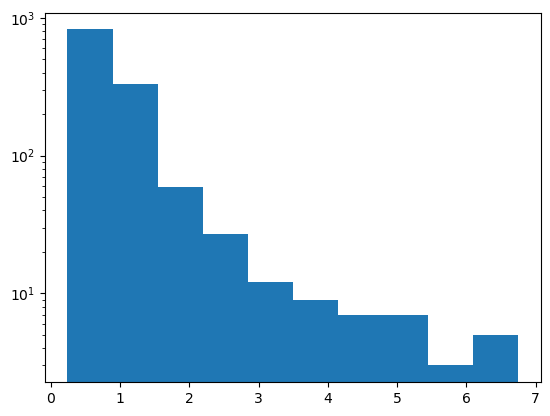

In [26]:
plt.hist(np.var(X_train_sex_scaled, axis=1)[np.var(X_train_sex_scaled, axis=1) < 3.14e04])
plt.yscale('log')
plt.show()

#quello che si nota dal grafico è che non ci sono colonne con varianza uguale a 0

In [27]:
sel = VarianceThreshold()
sel.fit(X_train_sex_scaled, y_train_sex)
print(sel.variances_) # è possibile vedere che tutte le features vengono rilevate con varianza = 1 che però non corrisponde ai valori che vediamo sopra!
print(sel.n_features_in_)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
236


In [28]:
valuesthreshold=[0,0.5,0.7,1] #this is a list of all the values of the threshold for the variance

for t in valuesthreshold:
    sel = VarianceThreshold(threshold=t)
    sel.fit(X_train_sex_scaled, y_train_sex)
    X_train_sex_var=sel.transform(X_train_sex_scaled)
    print(t, 'num of col: ', X_train_sex_var.shape )
    
    #----?????????

0 num of col:  (1279, 236)
0.5 num of col:  (1279, 236)
0.7 num of col:  (1279, 236)
1 num of col:  (1279, 117)


In [29]:
sel = VarianceThreshold(threshold=50)
sel.fit(X_train_sex)
X_train_sex_var=sel.transform(X_train_sex)
print(X_train_sex_var.shape)

# ------- ???????

(1279, 105)


In [30]:
sel = VarianceThreshold(threshold=(.99 * (1 - .99))) #rimuove le feature che hanno uno dei valori che appare con probabilità maggiore di 0.8 di apparire, e quindi avranno varianza molto bassa --> quasi tutti gli stessi valori
X_train_sel = sel.fit_transform(X_train_sex_scaled)

X_train_sel.shape
#-------?????

(1279, 236)

<h3>Univariate Feature Selection</h3>

In [31]:
from sklearn.feature_selection import SelectKBest

In [32]:
sel = SelectKBest(k=40) #definisco il selettore con il numero di colonne da selezionare 
sel.fit(X_train_sex_scaled, y_train_sex)
X_train_sex_ufs = sel.transform(X_train_sex_scaled) #faccio il fit sul training
X_test_sex_ufs = sel.transform(X_test_sex_scaled)

In [33]:
param_grid = {"n_neighbors": np.arange(1, 50), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"]}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=100,
)
grid.fit(X_train_sex_ufs, y_train_sex)
clf = grid.best_estimator_
 

In [34]:
print(grid.best_params_, grid.best_score_)

{'weights': 'distance', 'n_neighbors': 1, 'metric': 'euclidean'} 0.9723259803921569


In [35]:
X_test_sex_ufc=sel.transform(X_test_sex_scaled)
y_pred_ufc = clf.predict(X_test_sex_ufc)
print(X_test_sex_ufc.shape, accuracy_score(y_test_sex, y_pred_ufc))

(549, 40) 0.9690346083788707


UNIVARIATE FEATURE SELECTION - k is the number of features we are selecting

k=5 - 0.9453551912568307 <br/>
k=10 - 0.9508196721311475 <br/>
k=12 -  0.9562841530054644 <br/>
k=15 - 0.9599271402550091 <----- <br/> 
k=20 -  0.9599271402550091 <br/>
k=30 -  0.9690346083788707 <br/>
k=35 - 0.9690346083788707 <br/>
k=40 -  0.9690346083788707 <br/>
k=50 - 0.9817850637522769 <br/>


### RFE

In [36]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [37]:
sel = RFE(DecisionTreeClassifier(), n_features_to_select=15) # ho scelto 12 perchè veniva abbastanza bene
sel.fit(X_train_sex_scaled, y_train_sex)
X_train_sel_rfe=sel.transform(X_train_sex_scaled)
X_test_sel_rfe=sel.transform(X_test_sex_scaled)
X_train_sel.shape

(1279, 236)

In [38]:
param_grid = {"n_neighbors": np.arange(1, 50), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"]}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=100,
)
grid.fit(X_train_sel_rfe, y_train_sex)
clf = grid.best_estimator_

In [39]:
print(grid.best_params_, grid.best_score_)

{'weights': 'distance', 'n_neighbors': 6, 'metric': 'cityblock'} 0.9592631740196077


In [40]:
y_pred_rfe = clf.predict(X_test_sel_rfe)
print(X_test_sel_rfe.shape, accuracy_score(y_test_sex, y_pred_rfe))

(549, 15) 0.9690346083788707


RECURSIVE FEATURE ELIMINATION - k is the number of features we are selecting

k=5 - 0.9526411657559198 <br/>
k=10 - 0.9508196721311475 (uguale all'univariate feat sel)<br/> 
k=12 -  0.9599271402550091 <br/>
k=15 - 0.9690346083788707 <----- <br/> 
k=20 -  0.9653916211293261 <br/>
k=30 -  0.9854280510018215 <br/>
k=35 - 0.9872495446265938 <br/>
k=40 -  0.9799635701275046 <br/>
k=50 - 0.9817850637522769 <br/>


### Select From Model

In [41]:
from sklearn.feature_selection import SelectFromModel

In [42]:
selfm = SelectFromModel(DecisionTreeClassifier())
selfm.fit(X_train_sex_scaled, y_train_sex)
X_train_selfm = selfm.transform(X_train_sex_scaled)
X_test_selfm = selfm.transform(X_test_sex_scaled)
X_train_selfm.shape

(1279, 21)

In [43]:
param_grid = {"n_neighbors": np.arange(1, 50), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"]}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=100,
)
grid.fit(X_train_selfm, y_train_sex)
clf = grid.best_estimator_

In [44]:
print(grid.best_params_, grid.best_score_)

{'weights': 'distance', 'n_neighbors': 4, 'metric': 'cityblock'} 0.9642689950980392


In [45]:
y_pred_selfm = clf.predict(X_test_selfm)
print(X_test_selfm.shape, accuracy_score(y_test_sex, y_pred_selfm))

(549, 21) 0.9726775956284153


## Feature projection

### Principal Components Analysis

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)
pca.fit(X_train_sex_scaled)
X_train_pca = pca.transform(X_train_sex_scaled)

In [48]:
X_train_pca.shape

(1279, 2)

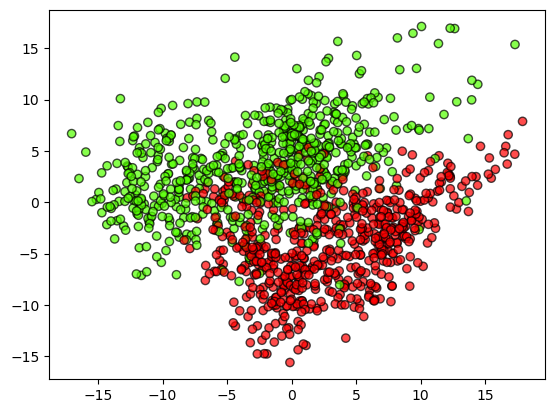

In [49]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_sex, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

#vediamo in due colori diversi i due diversi valori di sex --> M/F che abbiamo trasformato in 0/1

In [50]:
param_grid = {"n_neighbors": np.arange(1, 50), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"]}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=100,
)
grid.fit(X_train_pca, y_train_sex)
clf = grid.best_estimator_


In [51]:
print(grid.best_params_, grid.best_score_)

{'weights': 'uniform', 'n_neighbors': 11, 'metric': 'cityblock'} 0.8960153186274511


In [52]:
X_test_pca = pca.transform(X_test_sex_scaled)
y_pred_pca = clf.predict(X_test_pca)
print(X_test_pca.shape, accuracy_score(y_test_sex, y_pred_pca))

(549, 2) 0.8797814207650273


In [53]:
print(classification_report(y_test_sex, y_pred_pca))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       268
           1       0.87      0.90      0.88       281

    accuracy                           0.88       549
   macro avg       0.88      0.88      0.88       549
weighted avg       0.88      0.88      0.88       549



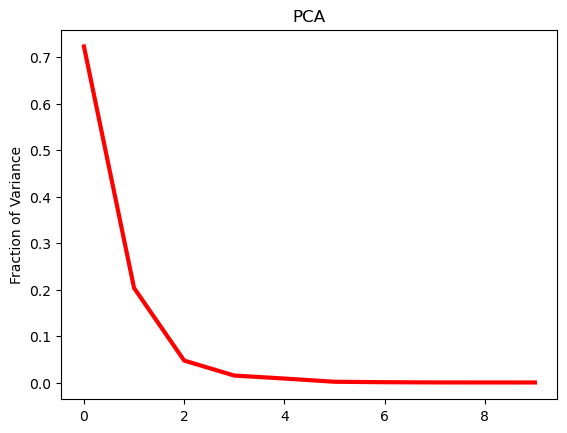

In [54]:
plt.plot(PCA(n_components=10).fit(X_values_nosex).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()
#fa vedere quanta varianza viene presa dalle diverse componenti

### Random Subspace Projection

In [55]:
from sklearn import random_projection

In [56]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=100)
X_train_rsp = rsp.fit_transform(X_train_sex_scaled)
X_train_rsp.shape

(1279, 2)

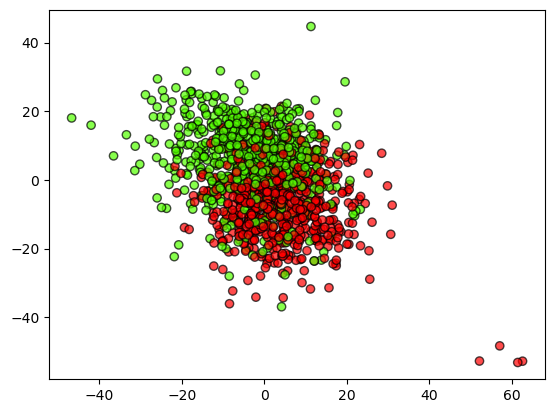

In [57]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train_sex, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [58]:
param_grid = {"n_neighbors": np.arange(1, 50), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"]}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=100,
)
grid.fit(X_train_rsp, y_train_sex)
clf = grid.best_estimator_


In [59]:
print(grid.best_params_, grid.best_score_)

{'weights': 'uniform', 'n_neighbors': 31, 'metric': 'euclidean'} 0.7844420955882352


In [60]:
X_test_rsp = rsp.transform(X_test_sex_scaled)
y_pred_rsp = clf.predict(X_test_rsp)
print(X_test_rsp.shape, accuracy_score(y_test_sex, y_pred_rsp))

(549, 2) 0.7540983606557377


In [61]:
print(classification_report(y_test_sex, y_pred_rsp))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       268
           1       0.76      0.76      0.76       281

    accuracy                           0.75       549
   macro avg       0.75      0.75      0.75       549
weighted avg       0.75      0.75      0.75       549



È facile vedere che il random sampling delle features da risultati decisamente peggiori rispetto alla PCA che cerca invece di massimizzare la varianza rappresentata

### Multi Dimensional Scaling

In [62]:
from sklearn.manifold import MDS

In [63]:
mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train_sex_scaled)
X_train_mds.shape

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(1279, 2)

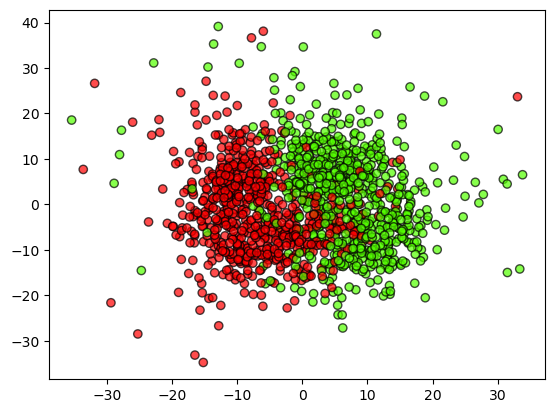

In [64]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train_sex, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [65]:
param_grid = {"n_neighbors": np.arange(1, 50), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"]}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=100,
)
grid.fit(X_train_mds, y_train_sex)
clf = grid.best_estimator_


In [66]:
print(grid.best_params_, grid.best_score_)

{'weights': 'uniform', 'n_neighbors': 9, 'metric': 'euclidean'} 0.8895211397058823


In [67]:
y_pred_mds = clf.predict(X_train_mds)
#NOTA: facciamo la predizione della variabile target sul train perchè MDS non ha il metodo transform per poter 
#trasformare il test, quindi facciamo tutto sul train

print('Accuracy %s' % accuracy_score(y_train_sex, y_pred_mds))
print('F1-score %s' % f1_score(y_train_sex, y_pred_mds, average=None))
print(classification_report(y_train_sex, y_pred_mds))

Accuracy 0.9053948397185301
F1-score [0.90249799 0.90812453]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       624
           1       0.90      0.91      0.91       655

    accuracy                           0.91      1279
   macro avg       0.91      0.91      0.91      1279
weighted avg       0.91      0.91      0.91      1279



### IsoMap

In [68]:
from sklearn.manifold import Isomap

In [69]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train_sex_scaled)
X_train_iso.shape

(1279, 2)

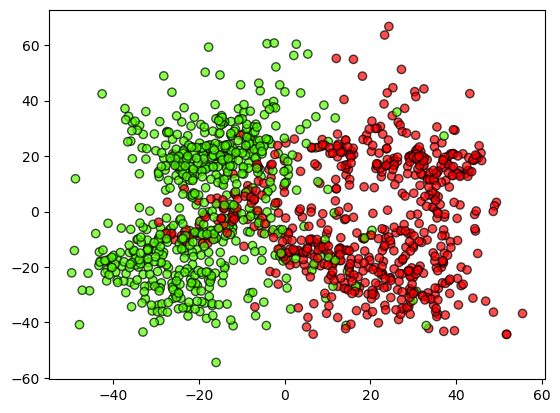

In [70]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train_sex, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [71]:
param_grid = {"n_neighbors": np.arange(1, 50), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"]}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=100,
)
grid.fit(X_train_iso, y_train_sex)
clf = grid.best_estimator_


In [72]:
print(grid.best_params_, grid.best_score_)

{'weights': 'uniform', 'n_neighbors': 9, 'metric': 'cityblock'} 0.8914025735294118


In [73]:
y_pred_iso = clf.predict(X_train_iso)
#NOTA: facciamo la predizione della variabile target sul train perchè ISOMAP, come MDS non ha il metodo transform 
#per poter trasformare il test, quindi facciamo tutto sul train

print('Accuracy %s' % accuracy_score(y_train_sex, y_pred_iso))
print('F1-score %s' % f1_score(y_train_sex, y_pred_iso, average=None))
print(classification_report(y_train_sex, y_pred_iso))

Accuracy 0.9093041438623924
F1-score [0.90705128 0.91145038]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       624
           1       0.91      0.91      0.91       655

    accuracy                           0.91      1279
   macro avg       0.91      0.91      0.91      1279
weighted avg       0.91      0.91      0.91      1279



Viene tutto a 1... ho sbagliato qualcosa? Oppure è possibile che isomap faccia così bene?

### t-SNE

In [74]:
from sklearn.manifold import TSNE

In [75]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train_sex_scaled)
X_train_tsne.shape

(1279, 2)

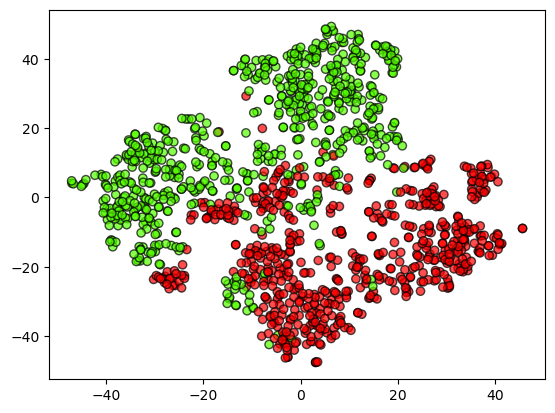

In [76]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_sex, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [77]:
param_grid = {"n_neighbors": np.arange(1, 50), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"]}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=100,
)
grid.fit(X_train_tsne, y_train_sex)
clf = grid.best_estimator_

In [78]:
print(grid.best_params_, grid.best_score_)

{'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'} 0.9642738970588235


In [79]:
y_pred_tsne = clf.predict(X_train_tsne)
#NOTA: facciamo la predizione della variabile target sul train perchè t-sne, come MDS e isomap 
#non ha il metodo transform per poter trasformare il test, quindi facciamo tutto sul train

print('Accuracy %s' % accuracy_score(y_train_sex, y_pred_tsne))
print('F1-score %s' % f1_score(y_train_sex, y_pred_tsne, average=None))
print(classification_report(y_train_sex, y_pred_tsne))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       624
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



Di nuovo viene tutto 1... provare a capire perchè